In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import seaborn as sns 
import matplotlib.pyplot as plt
import keras as k
from sklearn.model_selection import train_test_split
import sklearn as sk 

In [2]:
df = pd.read_csv('trainingdata.csv')
df

# Outside of "IDs" (game_id, home_team, away_team), the data contains 476 instances with 13 features.

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [3]:
def analyze(data):
    
  # View features in the data
  print("Features")
  print(data.columns.values)
  print("-" * 70)
    
  # View the details the features in the data (data type, non-null count, memory usage etc.)
  print("Feature Details")
  print(data.info())
  print("-" * 70)


analyze(df)

Features
['game_id' 'HomeTeam' 'AwayTeam' 'HomeScore' 'AwayScore' 'Home_xG'
 'Away_xG' 'Home_shots' 'Away_shots' 'Home_corner' 'Away_corner'
 'Home_PK_Goal' 'Away_PK_Goal' 'Home_PK_shots' 'Away_PK_shots' 'Home_ToP']
----------------------------------------------------------------------
Feature Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        476 non-null    object 
 1   HomeTeam       476 non-null    object 
 2   AwayTeam       476 non-null    object 
 3   HomeScore      476 non-null    int64  
 4   AwayScore      476 non-null    int64  
 5   Home_xG        476 non-null    float64
 6   Away_xG        476 non-null    float64
 7   Home_shots     476 non-null    int64  
 8   Away_shots     476 non-null    int64  
 9   Home_corner    476 non-null    int64  
 10  Away_corner    476 non-null    int64  
 11  Home_PK_Goal   

In [4]:
df['prev_results'] = df.apply(lambda row: 1 if row['HomeScore'] > row['AwayScore'] else 0, axis=1)
df.head()


,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,prev_results
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,0
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,1
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,0


In [5]:
features = ['HomeScore', 'AwayScore', 'Home_xG',
 'Away_xG', 'Home_shots', 'Away_shots', 'Home_corner', 'Away_corner',
 'Home_PK_Goal', 'Away_PK_Goal', 'Home_PK_shots', 'Away_PK_shots', 'Home_ToP']


def plot(df, features):
    
    for i in features:
        sns.scatterplot(data=df, x= i, y='prev_results')
        plt.show()

In [6]:
df = df.drop(['game_id', 'HomeTeam', 'AwayTeam'], axis=1)
df.head()

,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,prev_results
0,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0
1,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1
2,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,0
3,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,1
4,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,0


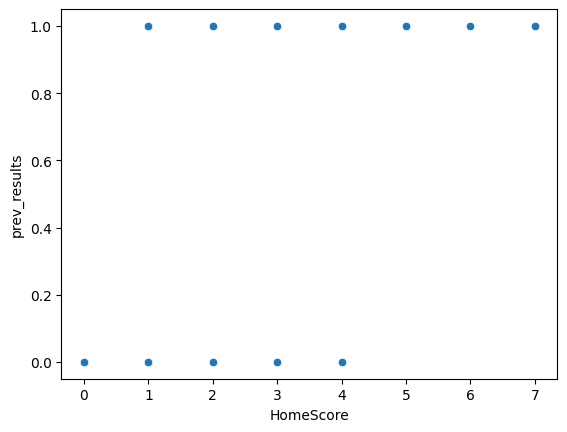

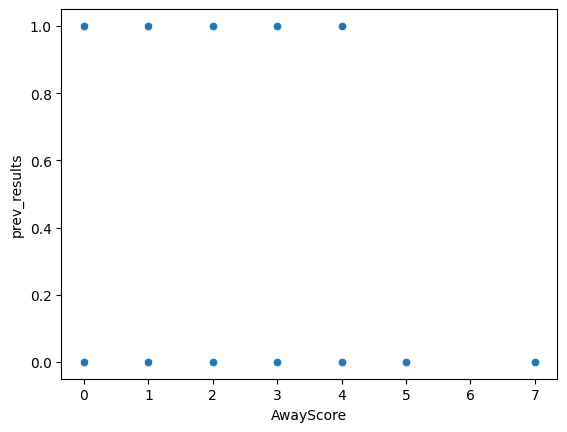

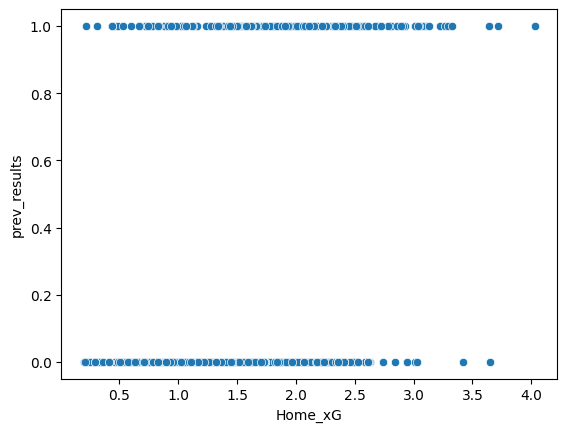

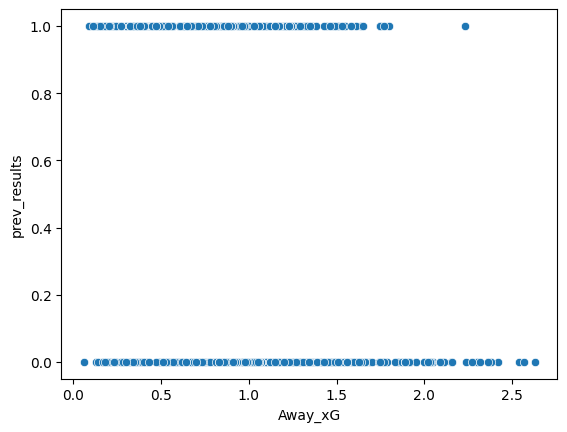

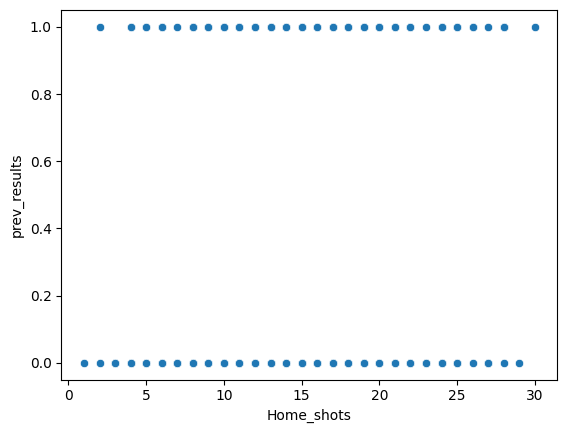

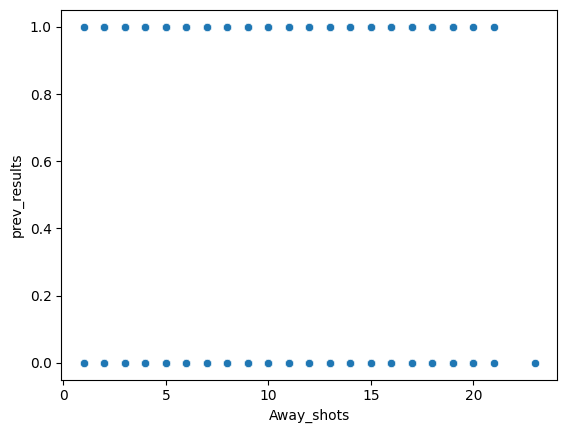

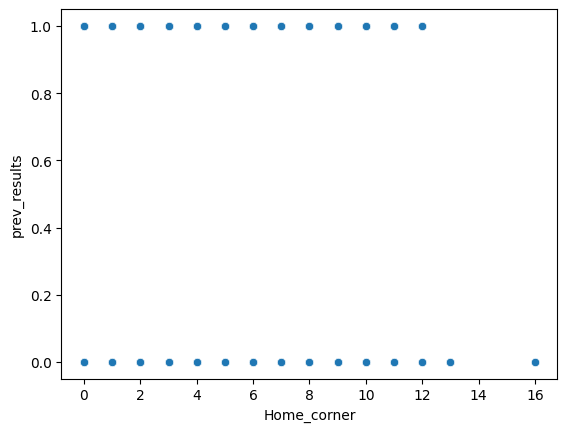

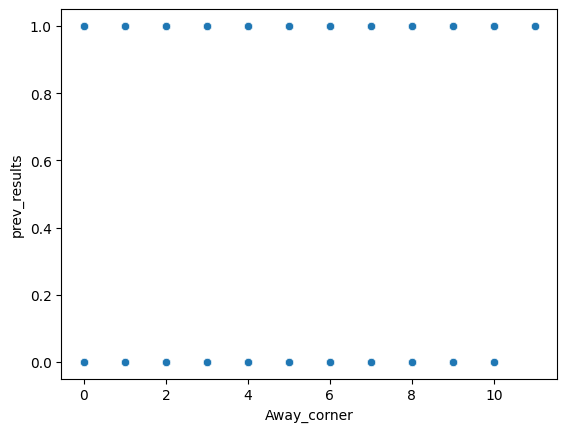

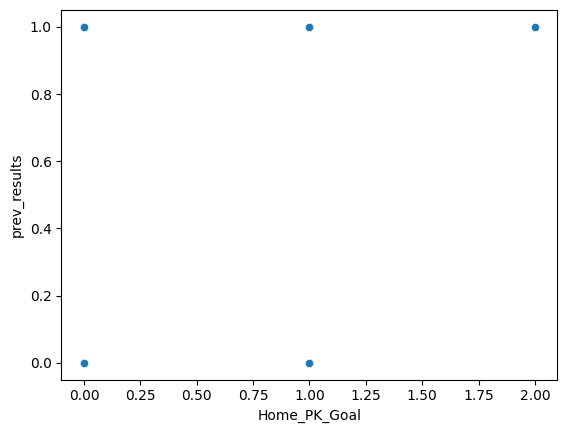

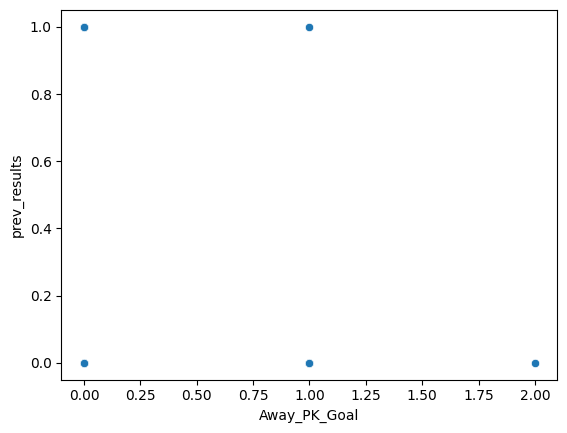

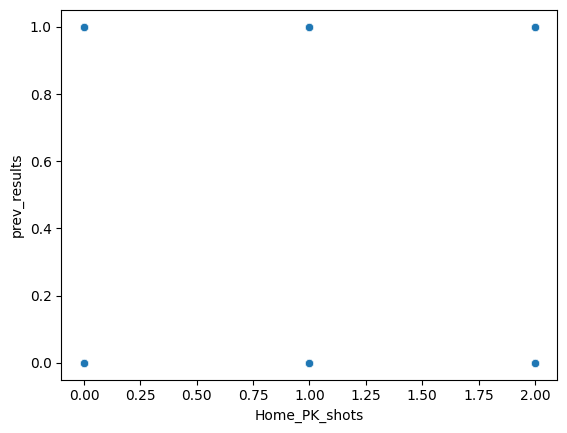

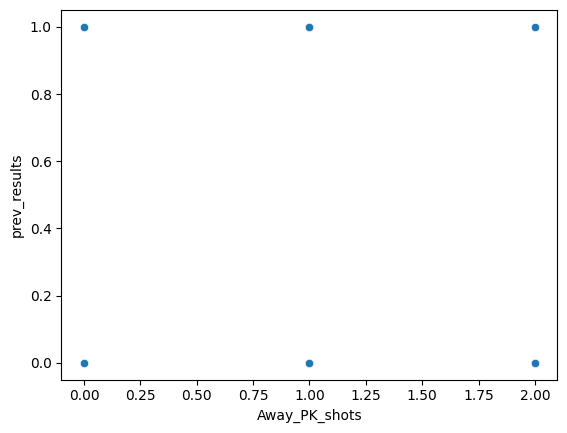

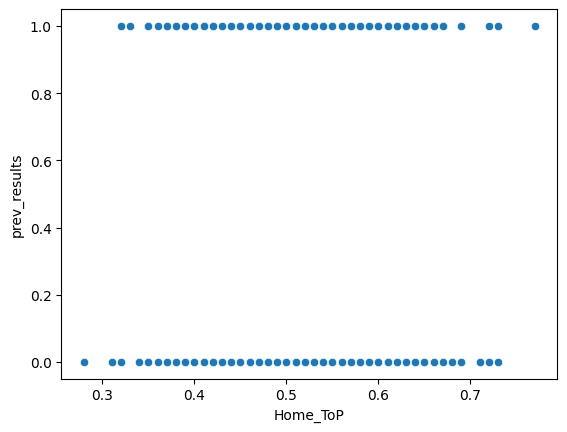

In [7]:
plot(df, features)

In [8]:
df['HomeConversion'] = df['HomeScore'] / df['Home_xG']
df['AwayConversion'] = df['AwayScore'] / df['Away_xG']
df['HomeAccuracy'] = df['HomeScore'] / df['Home_shots']
df['AwayAccuracy'] = df['AwayScore'] / df['Away_shots']

In [9]:
correlation = df.corr()
corr = correlation['prev_results'].sort_values(ascending=False)

corr


prev_results      1.000000
HomeScore         0.612433
HomeAccuracy      0.421621
HomeConversion    0.302462
Home_xG           0.298969
Home_shots        0.131280
Home_PK_Goal      0.127288
Home_PK_shots     0.119119
Home_ToP          0.067499
Home_corner       0.055772
Away_corner       0.043447
Away_PK_shots     0.004993
Away_PK_Goal     -0.071373
Away_shots       -0.112393
AwayConversion   -0.273310
Away_xG          -0.324928
AwayAccuracy     -0.415982
AwayScore        -0.502372
Name: prev_results, dtype: float64